# Convert Images to ASCII Characters

## Params

In [54]:
image_file_name = 'dylan.png'
max_size = 100  # pixels max height and/or width

## Libraries

In [55]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Functions

In [56]:
def make_greyscale(image):
  image_grey = []

  for row in image:
    grey_row = []
    for pixel in row:
      grey = int(pixel.mean())
      grey_pixel = [grey,grey,grey]
      grey_row.append(grey_pixel)
    image_grey.append(grey_row)

  display(image_grey)

  return np.array(image_grey)

In [57]:
def resize_rectangular_image(image, max_size):
  bias = 2 # <--- add a bias factor to the width to correct for character 2:1 height scaling

  height, width = image.shape[:2]

  if height > width:
      scale = max_size / height
      new_height = int(max_size)
      new_width = int(width * scale * bias)
  else:
      scale = max_size / width
      new_width = int(max_size * bias)
      new_height = int(height * scale)


  image = image.astype(np.uint8)
  image_pil = Image.fromarray(image)
  image_resized = image_pil.resize((new_width, new_height), Image.LANCZOS)
  image_resized = np.array(image_resized)

  return image_resized


In [58]:
def display(image):
  plt.imshow(image)
  plt.axis('off')
  plt.show()

## Load + process image

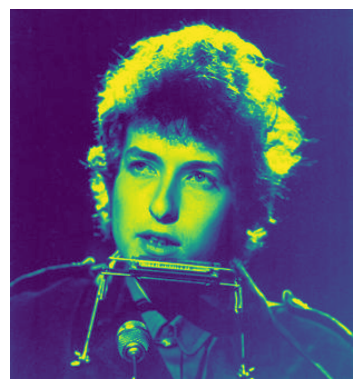

In [59]:
image = np.array(Image.open(image_file_name))
display(image)

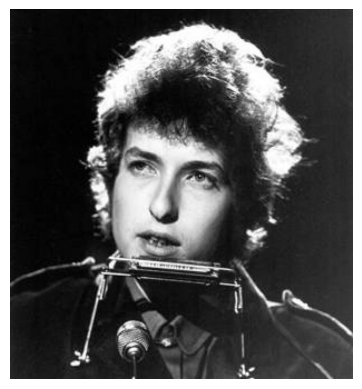

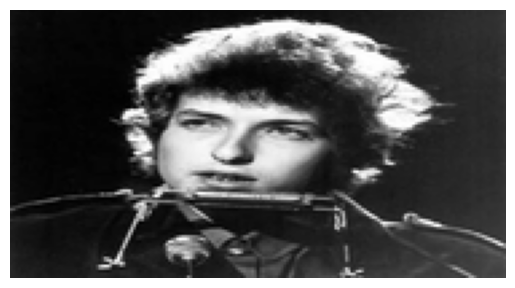

In [60]:
# process image --> greyscale + resize
image_grey = make_greyscale(image)
image_grey_resized = resize_rectangular_image(image_grey, max_size)
display(image_grey_resized)

In [61]:
DARKEST = '@'
DARK = '#'
MEDIUM_DARK = '*'
MEDIUM = '+'
MEDIUM_LIGHT = '.'
LIGHT = ' '

chars = [LIGHT, MEDIUM_LIGHT, MEDIUM, MEDIUM_DARK, DARK, DARKEST]
char_image = []

for row in image_grey_resized:
  char_row = []
  for pixel in row:
    pixel_avg = int(pixel.mean())
    if pixel_avg < 42:             # darkest
      char_row.append(chars[5])
    elif pixel_avg < 84:           # dark
      char_row.append(chars[4])
    elif pixel_avg < 126:          # medium-dark
      char_row.append(chars[3])
    elif pixel_avg < 168:          # medium
      char_row.append(chars[2])
    elif pixel_avg < 210:          # medium-light
      char_row.append(chars[1])
    else:                          # light
      char_row.append(chars[0])

  char_image.append(char_row)

In [62]:
# display characters

for row in char_image:
  print(''.join(row))

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#@@###################
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@##@@@##@###############
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#######################
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#@@@@@@#@@#**#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@####################
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#***+.....  ..*#*#@@@#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#@@########################
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Reverse -- for dark screen

In [63]:
DARKEST = ' '
DARK = '.'
MEDIUM_DARK = '+'
MEDIUM = '*'
MEDIUM_LIGHT = '@'
LIGHT = '#'

chars = [LIGHT, MEDIUM_LIGHT, MEDIUM, MEDIUM_DARK, DARK, DARKEST]
char_image = []

for row in image_grey_resized:
  char_row = []
  for pixel in row:
    pixel_avg = int(pixel.mean())
    if pixel_avg < 42:             # darkest
      char_row.append(chars[5])
    elif pixel_avg < 84:           # dark
      char_row.append(chars[4])
    elif pixel_avg < 126:          # medium-dark
      char_row.append(chars[3])
    elif pixel_avg < 168:          # medium
      char_row.append(chars[2])
    elif pixel_avg < 210:          # medium-light
      char_row.append(chars[1])
    else:                          # light
      char_row.append(chars[0])

  char_image.append(char_row)

In [64]:
char_image_string = ''
for row in char_image:
  char_image_string += ''.join(row) + '\n'

print(char_image_string)

                                                                                                                                                                   .  ...................
                                                                                                                                                                  ..   .. ...............
                                                                                                                                                                  .......................
                                                                                            .      .  .++.                                                           ....................
                                                                                             .+++*@@@@@##@@+.+.   .                                           .  ........................
                                                                      